In [1]:
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

data = pd.read_csv("data.csv")
data["time"] = pd.to_datetime(data["ts"], format='mixed').dt.time

In [2]:
timestamps = pd.Series(["2024-08-21 09:26:38", "2024-08-21 09:27:48", "2024-08-21 09:41:00", '2024-08-21 09:42:10', '2024-08-21 09:55:25', \
                '2024-08-21 09:56:55', '2024-08-21 10:06:17', '2024-08-21 10:07:47', '2024-08-21 10:25:00','2024-08-21 10:26:20',\
                '2024-08-21 10:35:25', '2024-08-21 10:36:45', '2024-08-21 10:40:13', '2024-08-21 10:41:33', '2024-08-21 10:45:52',\
                '2024-08-21 10:47:22', '2024-08-21 10:49:37', '2024-08-21 10:51:07', '2024-08-21 12:17:03','2024-08-21 12:27:53',\
                '2024-08-21 12:44:41', '2024-08-21 12:49:51', '2024-08-21 12:56:45', '2024-08-21 13:04:15'])

timestamps = pd.DataFrame(timestamps, columns=["timestamps"])
timestamps['time'] = pd.to_datetime(timestamps["timestamps"], format='mixed').dt.time

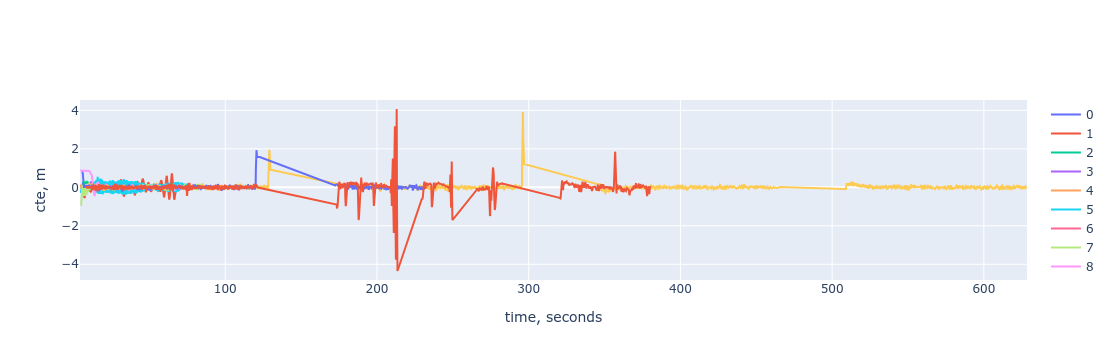

In [6]:
pd.options.plotting.backend = "plotly"
plot_data = pd.DataFrame()
fig = go.Figure()

for i in range(0, timestamps.shape[0], 2):
    start = timestamps.at[i, "time"]
    end = timestamps.at[i + 1, "time"]
    piece_of_data = data[(end >= data["time"]) & (data['time'] >= start)]
    delta = pd.to_timedelta(piece_of_data['time'].astype(str)) - pd.to_timedelta(str(start))
    piece_of_data.insert(piece_of_data.shape[1], 'time section', [i // 2] * piece_of_data.shape[0])
    plot_data = pd.concat([plot_data, piece_of_data])

    fig.add_trace(go.Scatter(y=piece_of_data.cte, x=delta.dt.total_seconds(), mode="lines", name=i//2))

fig.update_layout(
    yaxis_title="cte, m", xaxis_title="time, seconds"
)
fig.show()

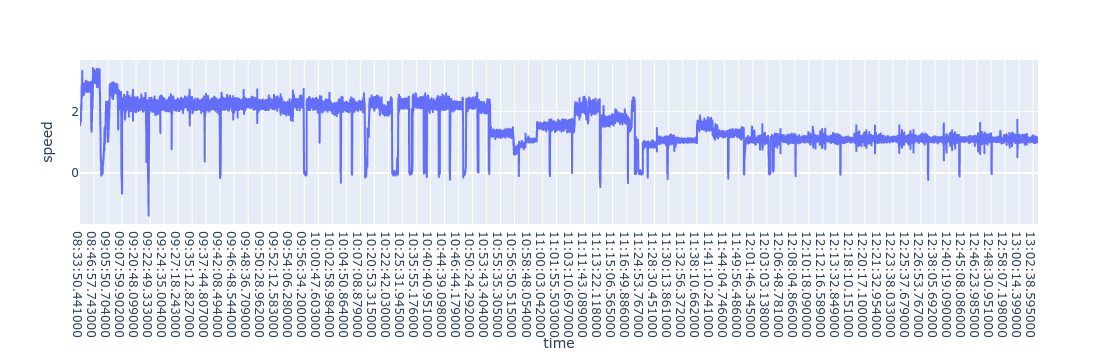

In [7]:
data.plot(x='time', y='speed')

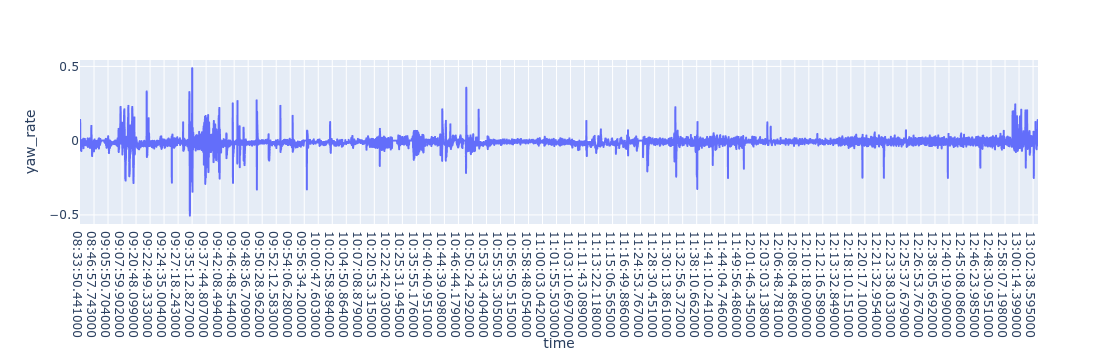

In [9]:
data.plot(x='time', y='yaw_rate')

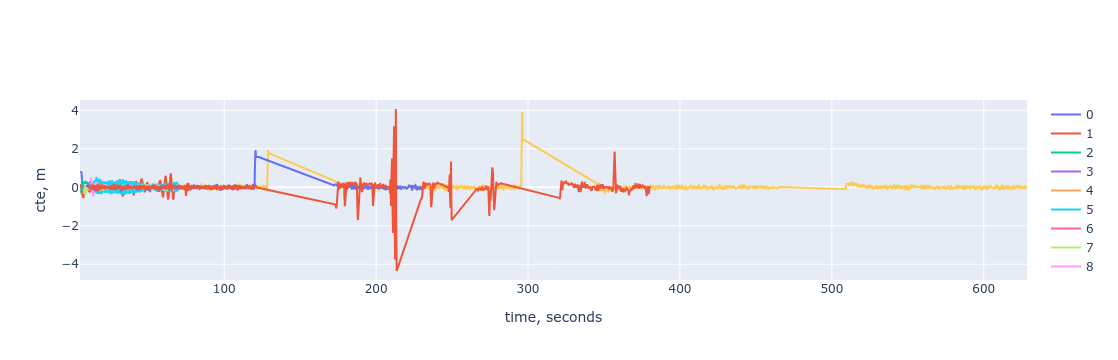

In [13]:
selected_data = data[(data['speed'] > 0.6) & (data['yaw_rate'] < 0.2) & (data['yaw_rate'] > -0.2)]
plot_data = pd.DataFrame()
fig = go.Figure()

for i in range(0, timestamps.shape[0], 2):
    start = timestamps.at[i, "time"]
    end = timestamps.at[i + 1, "time"]
    piece_of_data = selected_data[(end >= selected_data["time"]) & (selected_data['time'] >= start)]
    delta = pd.to_timedelta(piece_of_data['time'].astype(str)) - pd.to_timedelta(str(start))
    piece_of_data.insert(piece_of_data.shape[1], 'time section', [i // 2] * piece_of_data.shape[0])
    plot_data = pd.concat([plot_data, piece_of_data])

    fig.add_trace(go.Scatter(y=piece_of_data.cte, x=delta.dt.total_seconds(), mode="lines", name=i//2))

fig.update_layout(
    yaxis_title="cte, m", xaxis_title="time, seconds"
)
fig.show()

In [59]:
fig.write_image("images/cte(t) plot.png")